In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [39]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [10]:
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 15
figsize = [30, 15]

In [42]:
def FileCheck(fn):
    try:
        open(fn, "r")
        return True
    except IOError:
#         print("Error: File does not appear to exist.")
        return False

MO-GOMEA: data/200314_100915_1584176955301_zmom_MO-GOMEA_fos=LearnedLT_IMS
NSGA-II: data/200313_192034_1584123634492_ARK-7-MO_NSGA-II_xo=2p_pop=100
MO-LS: data/200314_102842_1584178122666_ARK-Online-2-cifar100_MO-LS-noloop-randdir
MO-RS: 


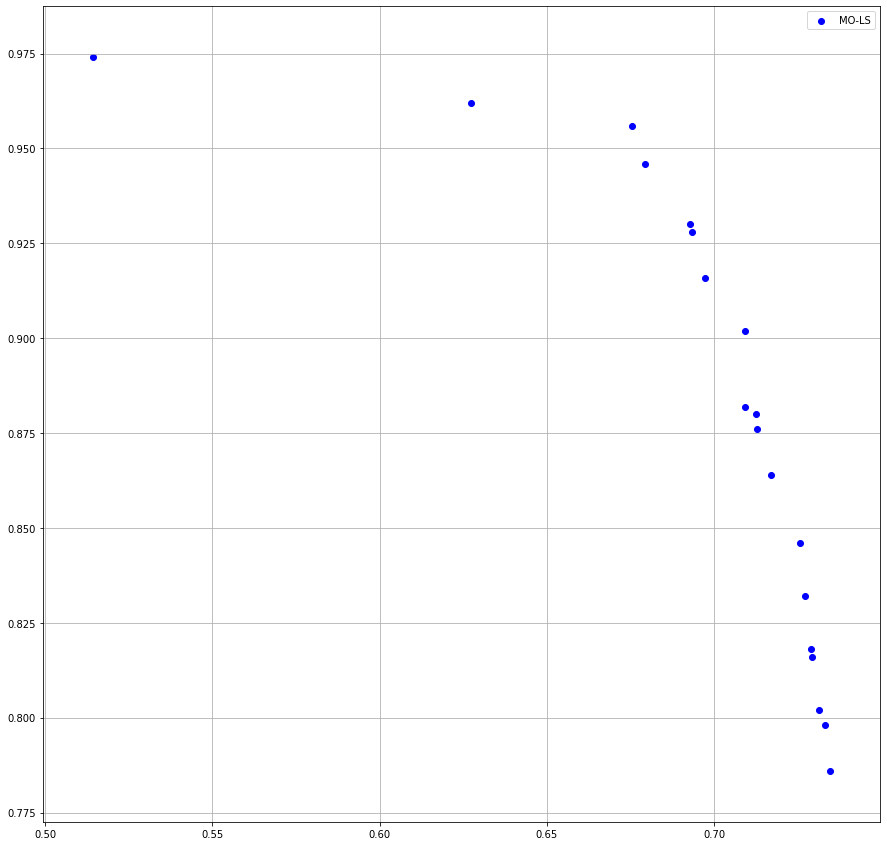

In [55]:
def plotAllOnThisServer (algorithms_to_plot, network_unique_evaluations):
    mogomeadir = ""
    lsdir = ""
    rsdir = ""
    nsgadir = ""
    
    prefix = "data/"
    
    for filename in sorted(os.listdir(prefix)):
        if "MO-GOMEA" in filename:
            mogomeadir = prefix + filename
        elif "MO-LS" in filename:
            lsdir = prefix + filename
        elif "MO-RS" in filename:
            rsdir = prefix + filename
        elif "NSGA-II" in filename:
            nsgadir = prefix + filename
    
    print("MO-GOMEA:", mogomeadir)
    print("NSGA-II:", nsgadir)
    print("MO-LS:", lsdir)
    print("MO-RS:", rsdir)
    
    fig, ax = plt.subplots(figsize=(15,15))
    if mogomeadir is not "" and "MO-GOMEA" in algorithms_to_plot:
        plotArchive(ax, mogomeadir, network_unique_evaluations, color="red", label="MO-GOMEA")
    if nsgadir is not "" and "NSGA-II" in algorithms_to_plot:
        plotArchive(ax, nsgadir, network_unique_evaluations, color="green", label="NSGA-II")
    if lsdir is not "" and "MO-LS" in algorithms_to_plot:
        plotArchive(ax, lsdir, network_unique_evaluations, color="blue", label="MO-LS")
    if rsdir is not "" and "MO-RS" in algorithms_to_plot:
        plotArchive(ax, rsdir, network_unique_evaluations, color="orange", label="MO-RS")
        
    ax.legend()
    ax.grid()

plotAllOnThisServer(["MO-LS"], 100)

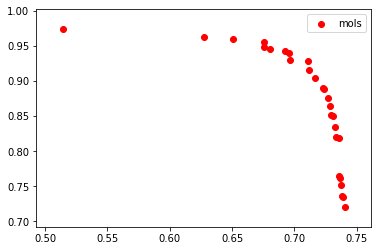

In [52]:
def plotArchive(ax, folder, network_unique_evaluations, color, label):
    filename = folder + "/progress0.json"
    if not FileCheck(filename):
        print("File with name", filename, "could not be found.")
        return
    
    with open(filename) as json_file:
        data = json.load(json_file)
#         print(data.keys())
#         print(data["network_unique_evals"])
        index = -1
        max_network_unique_evaluations = -1
        for i in range(len(data["network_unique_evals"])):
            max_network_unique_evaluations = data["network_unique_evals"][i]
            if data["network_unique_evals"][i] == network_unique_evaluations:
                index = i
                break
                
        if index == -1:
            print("Algorithm did not yet do", network_unique_evaluations, "evaluations. Can plot up to", max_network_unique_evaluations, "evaluations.")
            return
                
        archive = data["elitist_archive"][index]
#         print(archive)

        X = np.zeros(len(archive))
        Y = np.zeros(len(archive))
        
        for i in range(len(archive)):
            X[i] = archive[i]['f'][0]
            Y[i] = archive[i]['f'][1]
            
        ax.scatter(X, Y, color=color, label=label)

        
        
    
fig, ax = plt.subplots()
plotArchive(ax, "data/exp20/200314_102842_1584178122666_ARK-Online-2-cifar100_MO-LS-noloop-randdir/", 689, "red", "mols")
ax.legend()
    

# Calculation of hypervolume

In [91]:
def calculateHypervolume(archive):
    nparchive = np.zeros((len(archive), 2))
    for i, sol in enumerate(archive):
        nparchive[i, 0] = sol["f"][0]
        nparchive[i, 1] = sol["f"][1]
        
    # Sorting array based on first objective
    sorted_archive = nparchive[np.argsort(nparchive[:, 0])]
    # Reverse array
    sorted_archive = sorted_archive[::-1]

    bottomBoundary = 0
    leftBoundary = 0

    hv = 0
    bottom = bottomBoundary
    for i in range(len(sorted_archive)):
        hv = hv + (sorted_archive[i, 0] - leftBoundary) * (sorted_archive[i, 1] - bottom)
        bottom = sorted_archive[i, 1]

    return hv

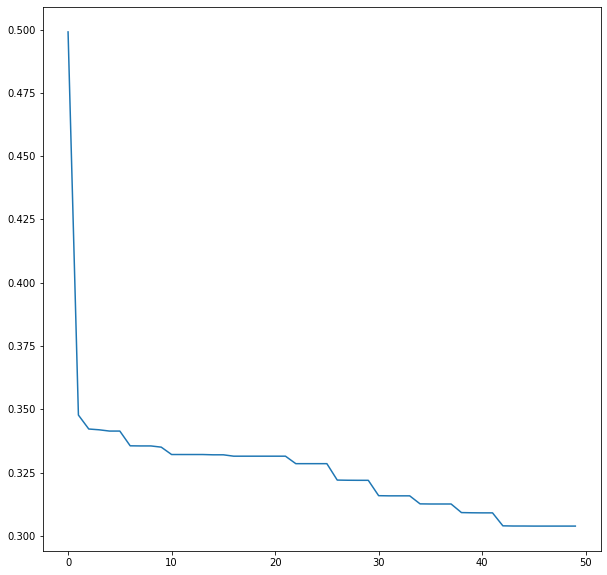

In [92]:
def plotHyperVolume(ax, folder, network_unique_evaluations, color, label):
    filename = folder + "/progress0.json"
    if not FileCheck(filename):
        print("File with name", filename, "could not be found.")
        return
    
    
    with open(filename) as json_file:
        data = json.load(json_file)
#         print(data.keys())
#         print(data["network_unique_evals"])

        unique_evals = -1
        new_unique_evals = -1
        max_network_unique_evaluations = -1
        
        hypervolume = np.zeros(network_unique_evaluations)

        for i in range(len(data["network_unique_evals"])):
            new_unique_evals = data["network_unique_evals"][i]
            if new_unique_evals == unique_evals:
                continue
            unique_evals = new_unique_evals
            max_network_unique_evaluations = unique_evals
            
            archive = data["elitist_archive"][i]
            hv = calculateHypervolume(archive)
            hypervolume[unique_evals - 1] = hv
            
            if max_network_unique_evaluations == network_unique_evaluations:
                break
    
        ax.plot(list(range(len(hypervolume))), 1 - hypervolume)
            
fig, ax = plt.subplots(figsize=(10,10))
plotHyperVolume(ax, "data/exp20/200313_102842_1584178122666_ARK-Online-2-cifar100_MO-LS-noloop-randdir/", 50, color="red", label="MO-LS")

In [90]:
from scipy.interpolate import make_interp_spline, BSpline


In [101]:
from scipy import interpolate


No handles with labels found to put in legend.
No handles with labels found to put in legend.


dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])
dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])
dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])
dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])


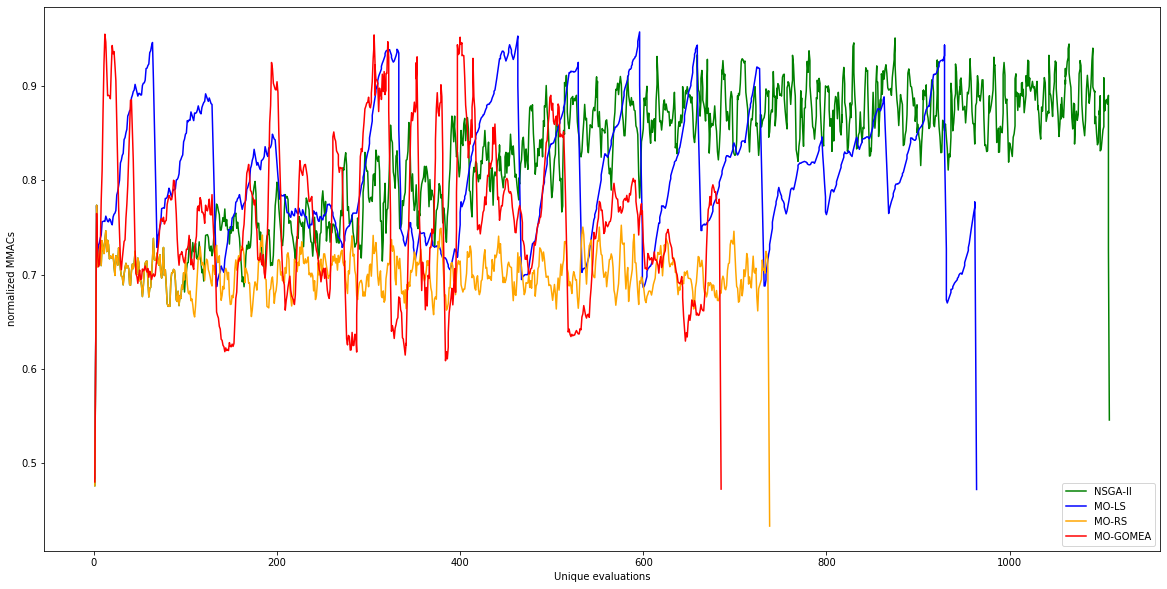

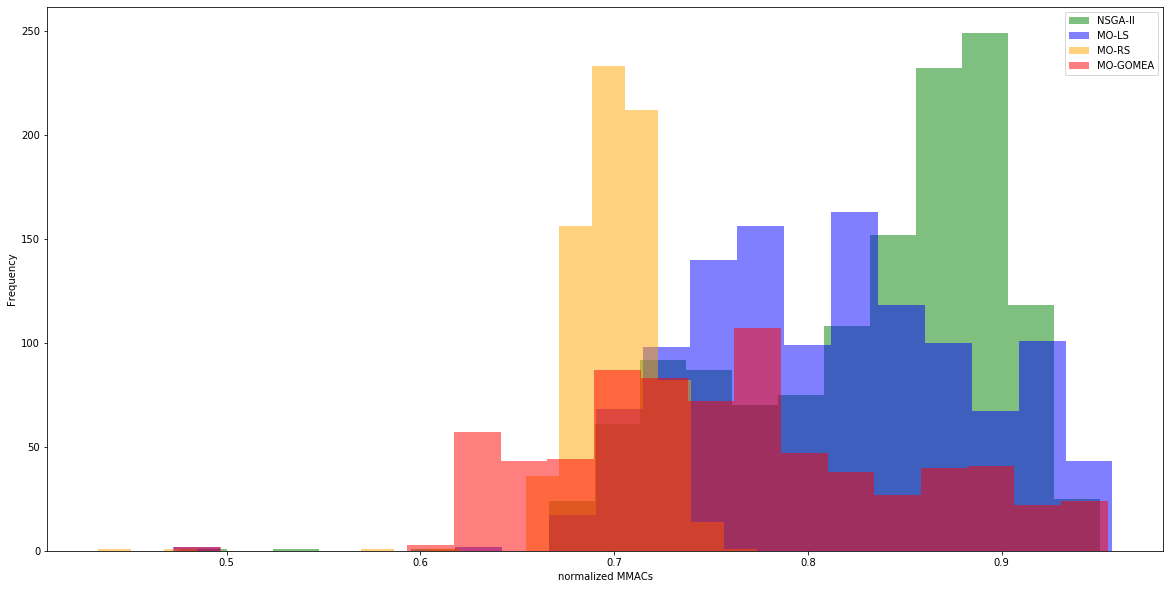

In [126]:
fig, ax = plt.subplots(figsize=(20,10))
fig2, ax2 = plt.subplots(figsize=(20,10))

prefix = "data/meteor02/"
for filedir in sorted(os.listdir(prefix)):
    if 'ARK-Online' in filedir:
        filename = prefix + filedir + "/Progress0.json"
        if not FileCheck(filename):
            print ("Could not find file with name", filename)
            
        if 'MO-GOMEA' in filedir:
            color = "red"
            label = 'MO-GOMEA'
        elif 'NSGA-II' in filedir:
            color = "green"
            label = "NSGA-II"
        elif 'MO-LS' in filedir:
            color = "blue"
            label = "MO-LS"
        elif 'MO-RandomSearch' in filedir:
            color = "orange"
            label = "MO-RS"
        
        with open (filename) as json_file:
            data = json.load(json_file)
            print(data.keys())
#             print(data['network_unique_evals'])
            
            X = []
            Y = []
            
            evals = -1
            for i, e in enumerate(data['network_unique_evals']):
                if int(e) is evals:
#                     print("continue")
                    continue
                evals = int(e)
                X.append(evals)
                Y.append(data['evaluated_solution_fitness'][i][1])
                
            N = 5
            Y = np.convolve(Y, np.ones((N,))/N, mode='same')
                
            ax.plot(X, Y, color=color, label=label)
            ax2.hist(Y, color=color, label=label, bins=20, alpha=0.5)
            
    ax.legend()
    ax.set_xlabel("Unique evaluations")
    ax.set_ylabel("normalized MMACs")
    ax2.legend()
    ax2.set_xlabel("normalized MMACs")
    ax2.set_ylabel("Frequency")

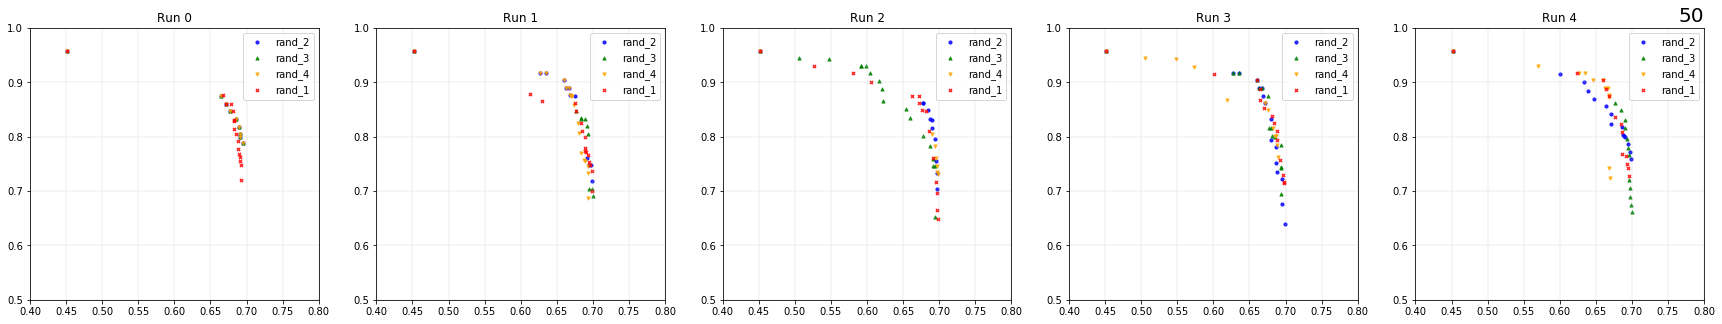

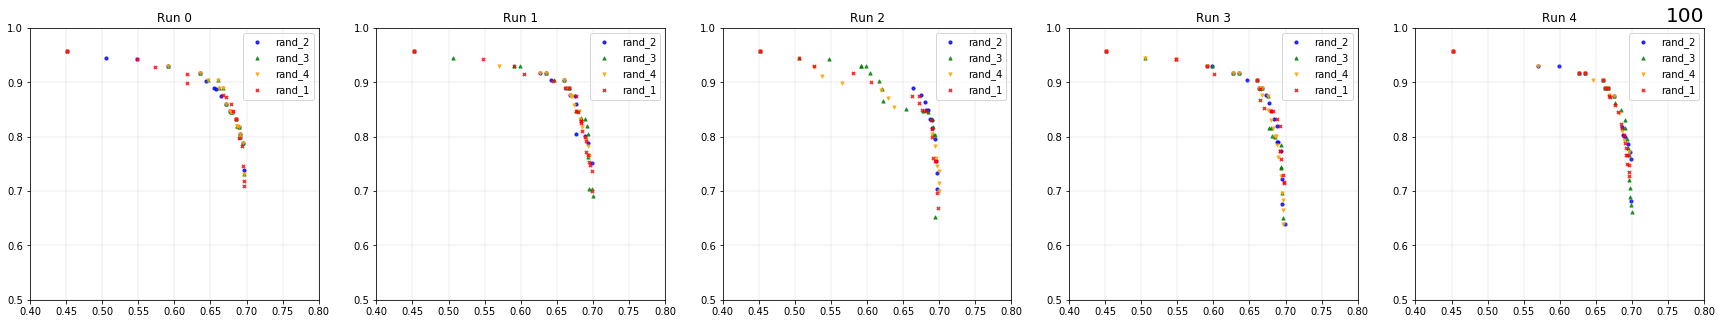

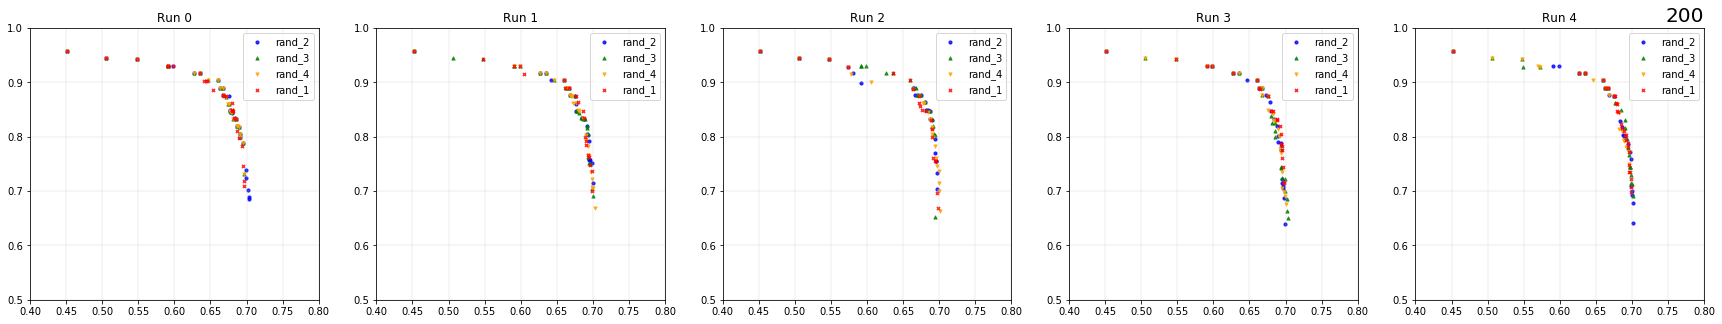

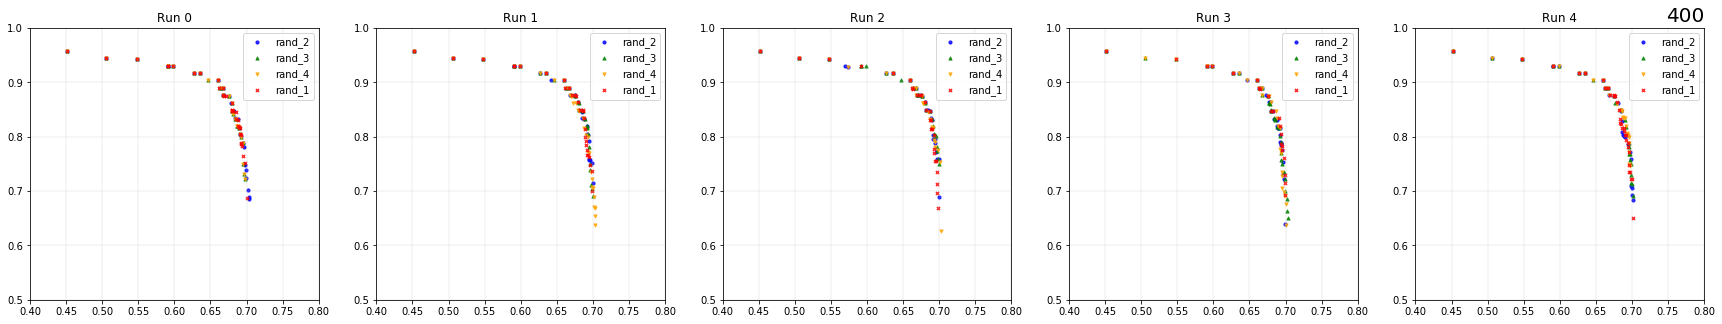

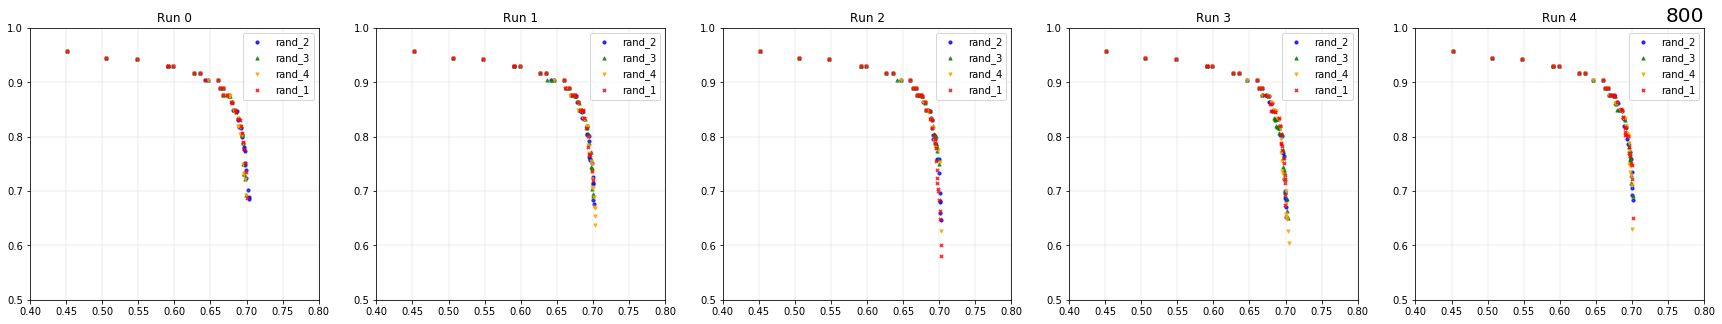

In [193]:
colors = ["red", "blue", "green", "orange"]
markers = ["x", "o", "^", "v"]

def plotArchiveMOLSExperiment(direction, loopcount):
    for targetEvals in [50, 100, 200, 400, 800]:
        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30,5))

        for i in range(5):
            ax[i].set_xlim(0.4, 0.8)
            ax[i].set_ylim(0.5, 1.0)
            ax[i].grid(linewidth=0.2)
            ax[i].set_title("Run " + str(i))
            plt.title(str(targetEvals), loc="right", size="20")

#             for direction in [0.9, 0.95, 1]:
            for loopcount in [2, 3, 4, 1]:
                with open("data/exp21/MO-LS_dir" + str(direction) + "_loop" + str(loopcount) + "/MO_info" + str(i) + ".json") as json_file:
                    data = json.load(json_file)
                    data = data['changes_on_interval']['network_unique_evals']
                    index = -1
                    for idx in range(len(data['evals'])):
                        if targetEvals <= data['evals'][idx]:
                            index = idx
                            evals = data['evals'][idx]
                            break

                    archive = data['elitist_archive_fitness'][index]

                    X = []
                    Y = []

                    for sol in archive:
                        X.append(sol['f'][0])
                        Y.append(sol['f'][1])

#                     if direction == 0.9:
#                         color="red"
#                     elif direction == 0.95:
#                         color="blue"
#                     else:
#                         color="orange"

                    color = colors[loopcount - 1]
                    marker = markers[loopcount - 1]
                    ax[i].scatter(X, Y, s=10, label=(str(direction) + "_" + str(loopcount)), color=color, alpha=0.8, marker=marker)
            ax[i].legend()

plotArchiveMOLSExperiment("rand", 1)

In [45]:
import glob

Plotting hypervolume until 1250 unique evaluations


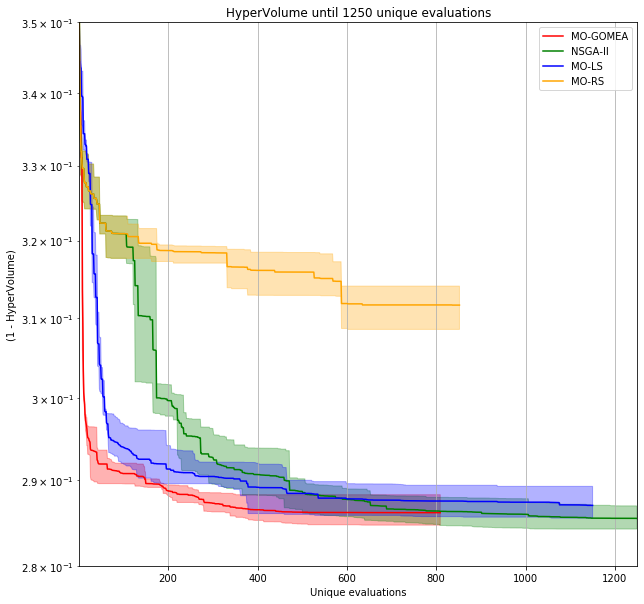

Saving plot to 'plotHyperVolumeCombined.png' in current working directory.


In [55]:
import json
import numpy as np
import os
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt
import sys

def FileCheck(fn):
    try:
        open(fn, "r")
        return True
    except IOError:
#         print("Error: File does not appear to exist.")
        return False

# def findFilename(folder, filename):
#     for i in sys.

def calculateHypervolume(archive):
    nparchive = np.zeros((len(archive), 2))
    for i, sol in enumerate(archive):
        nparchive[i, 0] = sol["f"][0]
        nparchive[i, 1] = sol["f"][1]

    # Sorting array based on first objective
    sorted_archive = nparchive[np.argsort(nparchive[:, 0])]
    # Reverse array
    sorted_archive = sorted_archive[::-1]

    bottomBoundary = 0
    leftBoundary = 0

    hv = 0
    bottom = bottomBoundary
    for i in range(len(sorted_archive)):
        hv = hv + (sorted_archive[i, 0] - leftBoundary) * (sorted_archive[i, 1] - bottom)
        bottom = sorted_archive[i, 1]

    return hv

def plotHyperVolume(ax, folder, algo, plot_until, color, label):
    hypervolume = np.zeros((plot_until, 100))
    limit_evals = -1
    for run in range(100):
        queriedFilename = folder + algo + "_run" + str(run+1) + "_seed*" + "/progress0.json"
        regexFilenames = glob.glob(queriedFilename)
        if len(regexFilenames) == 0:
#             print("File with name", queriedFilename, "could not be found.")
            hypervolume = hypervolume[:, :run]
#             print(hypervolume.shape)
            break
#         print("reading file " + filename)
        filename = regexFilenames[0]

        with open(filename) as json_file:
            data = json.load(json_file)

            unique_evals = -1
            new_unique_evals = -1

            for i in range(len(data["network_unique_evals"])):
                new_unique_evals = data["network_unique_evals"][i]
                if new_unique_evals == unique_evals:
                    continue
                unique_evals = new_unique_evals

                archive = data["elitist_archive"][i]
                hv = calculateHypervolume(archive)
                hypervolume[unique_evals - 1, run] = hv

                if unique_evals == plot_until:
                    break

            if unique_evals < plot_until:
                hypervolume[unique_evals:, run] = hv
                
            limit_evals = max(limit_evals, unique_evals)

            # Plot every line
#             ax.plot(list(range(plot_until)), 1 - hypervolume[:,run], color=color, label=label+str(run), alpha=0.2)

    xrange = list(range(limit_evals))
    ax.plot(xrange, 1 - np.mean(hypervolume[:limit_evals],1), color=color, label=label)
    ax.fill_between(xrange, 1 - np.min(hypervolume[:limit_evals],1), 1 - np.max(hypervolume[:limit_evals],1), alpha=0.3, color=color)

def plotAll (algorithms_to_plot, plot_until):
    mogomeadir = ""
    lsdir = ""
    rsdir = ""
    nsgadir = ""

    folder = "data/online/"

    fig, ax = plt.subplots(figsize=(10,10))

    plotHyperVolume(ax, folder, "MO-GOMEA", plot_until, color="red", label="MO-GOMEA")
    plotHyperVolume(ax, folder, "NSGA-II", plot_until, color="green", label="NSGA-II")
    plotHyperVolume(ax, folder, "MO-LS", plot_until, color="blue", label="MO-LS")
    plotHyperVolume(ax, folder, "MO-RS", plot_until, color="orange", label="MO-RS")

    ax.legend()
    ax.grid()
    ax.set_title("HyperVolume until " + str(plot_until) + " unique evaluations")
    ax.set_xlim(1, plot_until)
    ax.set_ylim(0.28, 0.35)
    ax.set_xlabel("Unique evaluations")
    ax.set_ylabel("(1 - HyperVolume)")
#     ax.set_xscale("log")
    ax.set_yscale("log")
    plt.savefig("plotHyperVolumeCombined.png")
    plt.show()
    print("Saving plot to 'plotHyperVolumeCombined.png' in current working directory.")
    # plt.show()

def main(arg):
    evaluations = int(arg)
    print("Plotting hypervolume until", evaluations, "unique evaluations")

    algorithms = ["MO-GOMEA", "NSGA-II", "MO-LS", "MO-RS"]

    plotAll(algorithms, evaluations)


# if __name__ == '__main__':
#     main()

main(1250)